# COGS 108 - Correlations with California's Crime

## Permissions

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

This project sought to determine the correlation of several variables with crime, in the counties of California. We tested whether a Californian county's annual income, average temperature, population density, and the number of officers are correlated with crime individually, and later whether we could predict crime using this data. Our research suggests that annual crime in these counties is very predictable given these factors.

# Names

- Will Sumerfield
- Kaiyu Guan
- Janty Sphabmixay
- Tong Zeng

<a id='research_question'></a>
# Research Question

To what degree are the crime rates in the counties of San Diego correlated and predictable using data including population density, weather, temperature, income, and the number of police stations in these areas?

# Background and Prior Work

References (include links):
- 1) [Geography of Crime](https://iopscience.iop.org/article/10.1088/1757-899X/245/7/072012/pdf)
- 2) [Waitz Library Traffic Project](https://github.com/COGS108/FinalProjects-Wi18/blob/master/059-FinalProject.ipynb)

## Geography of Crime

### Summary
This article from Turkey is a discussion and analysis of crime in the urban world, with the aim of helping inform future urban planning so as to avoid the facilitation of crime. Specifically, they suggest that urban crime is due to the density of money in urban areas, the ease of escape, and the high proportion of people to law enforcement. They also suggest that places that are particularly prone to crime are chaotic/dense places, city/commerce centers,
and places with few/no behavioral rules.


### What We Learned
- Density of Police could be a key feature to analyze
- City Centers could be an additional feature to analyze
- Certain types of crime may have creased during COVID-19 due to reduced crowding?

## Waitz Library Traffic Project
Our project focuses on analyzing past crime rates that have taken place throughout San Diego and the different factors that might come into effect when crimes are committed. These factors include crime, income, population density, weather and temperature, and the number of police stations located in an area.

When reviewing previous COGS 108 final projects our group found a project called Waitz Library Traffic that includes a similar approach we hope to implement in our own project. The Waitz Library Traffic project’s main idea was to predict the traffic in UCSD’s libraries using various types of data including weather, classes schedules, shuttles, and traffic. After reviewing this project we have learned that it’s best to gather at least three various types of data in order to form a strong conclusion as well as to make sure our data collected is valid and within the same time period in order to ensure a strong dataset. With the information gathered after reviewing the Waitz Library Traffic project, our group will be implementing the collection of five different datasets within the same time period as well as examining our data gathered to ensure their validity.

# Hypothesis

We believe that the number of police, income, population density, temperature, and precipitation are some possible factors that are related to the number of crimes committed in the counties of California. Therefore, our hypotheses are that crimes rates are positively correlated with income and population density while negatively correlated with the weather, temperature, and the number of police stations. Thus, using data from income maps, weather forecasts, and the San Diego map, our group hypothesized that we could predict the future crimes rates in San Diego.

# Datasets

- **Dataset Name:** Yearly Temperature in all counties in California, 2010 - 2019
- **Link to the dataset:** https://www.ncdc.noaa.gov/cag/county/mapping/4/tavg/201902/1/value
- **Number of observations:** 580

This dataset contains the yearly information about the average temperature and precipitation of all 58 counties in
California in 2010 - 2019. This dataset is obtained by merging two datasets(average temperature, average precipitation)
which are both accessible on NCDC.

- **Dataset Name:** Police Per County 2010 - 2019
- **Link to the dataset:** https://github.com/COGS108/Group052-Fa21/tree/master/Datasets/Police%20Per%20County
- **Number of observations:** 580

This dataset contains the number of policemen/women in the Counties of California from 2010 to 2019.
We acquired this data by downloading directly from fbi.gov where this data is completely public for everyone to use.

- **Dataset Name:** Income Per County 2010 - 2019
- **Link to the dataset:** https://data.census.gov/cedsci/table?q=California%20Income&t=Earnings%20%28Individuals%29&g=0400000US06%240500000&tid=ACSST1Y2019.S1902
- **Number of observations:** 401

This dataset contains the Mean Income of counties in California in USD per year, along with the margin of error for that data.
This data comes from the United States Census, and is available for public use.

- **Dataset Name:** Population Density Per County
- **Link to the dataset:** https://www.indexmundi.com/facts/united-states/quick-facts/california/population-density#table
- **Number of observations:** 580

This dataset contains the population density in people per square mile in each county, from 2010 to 2019. This data comes from the California Government Data Portal called Open Justice.

- **Dataset Name:** Crimes Per County
- **Link to the dataset:** https://data-openjustice.doj.ca.gov/sites/default/files/dataset/2021-07/Crimes_and_Clearances_with_Arson-1985-2020.csv 
- **Number of observations:** 580

This dataset contains all of the crimes and clearances (including arson) found in all counties across California from 2010 to 2019. This data comes from the California Open Justice Data Portal and is available for public use.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import math
from functools import reduce
from sklearn.model_selection import KFold
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

# Data Cleaning

We first download the five datasets from the websites respectively. Then we retrieve columns that contain our desired variables, rename those columns to be more comprehensive, and check for null values. When merging the datasets, we will merge each independent variable (weather, income, police, population density) with the dependent variable(crime) on county and year.

## Police

In [2]:
#Read the police datasets from 2010 to 2019
police2010 = pd.read_csv('Datasets/Police Per County/Police Per County 2010.csv')
police2011 = pd.read_csv('Datasets/Police Per County/Police Per County 2011.csv')
police2012 = pd.read_csv('Datasets/Police Per County/Police Per County 2012.csv')
police2013 = pd.read_csv('Datasets/Police Per County/Police Per County 2013.csv')
police2014 = pd.read_csv('Datasets/Police Per County/Police Per County 2014.csv')
police2015 = pd.read_csv('Datasets/Police Per County/Police Per County 2015.csv')
police2016 = pd.read_csv('Datasets/Police Per County/Police Per County 2016.csv')
police2017 = pd.read_csv('Datasets/Police Per County/Police Per County 2017.csv')
police2018 = pd.read_csv('Datasets/Police Per County/Police Per County 2018.csv')
police2019 = pd.read_csv('Datasets/Police Per County/Police Per County 2019.csv')
police2010.head(10)

,Table 80,,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CALIFORNIA,NaN,NaN,NaN,NaN
1,Full-time Law Enforcement Employees,NaN,NaN,NaN,NaN
2,"by Metropolitan and Nonmetropolitan Counties, ...",NaN,NaN,NaN,NaN
3,Metropolitan/Nonmetropolitan,County,Total law\nenforcement\nemployees,Total\nofficers,Total\ncivilians
4,Metropolitan Counties,Alameda,"1,635",986,649
5,NaN,Butte,258,101,157
6,NaN,Contra Costa,952,637,315
7,NaN,El Dorado,346,173,173
8,NaN,Fresno,891,693,198
9,NaN,Imperial,271,180,91


We found that since all the dataframe of police are download from the same website and are in same format, we decided
to define a function that clean all the 10 dataframes.

In [3]:
def to_int(string):
    return int(string.replace(',', ''))

def clean(df):
    #Found the year of the dataframe
    year = df[df.columns[0]].iloc[2][-4:]
    #For every dataframe, drop the first 4 rows which contains unwanted information
    df = df.drop(df.index[[0, 1, 2, 3]])
    #Retrive colomns with useful information
    df = df.iloc[: , 1:5]
    #Reindex the dataset
    df = df.reset_index(drop = True)
    #Rename the columns
    df = df.rename(columns={df.columns[0]: 'County', df.columns[1]: 'Total_Officers', df.columns[2] : 'Officers', df.columns[3] : 'Civilian_Officers'})
    #Extract wanted columns from the dataset
    df = df[['County', 'Total_Officers']]
    #Add a colomn of year and convert all the values in columns of Total_officers to integer
    df = df.assign(
        Year = np.repeat(int(year), df.shape[0]),
        Total_Officers = df['Total_Officers'].apply(to_int)
    )
    return df

In [4]:
#apply the defined function to all the DataFrame
police_2010 = clean(police2010)
police_2011 = clean(police2011)
police_2012 = clean(police2012)
police_2013 = clean(police2013)
police_2014 = clean(police2014)
police_2015 = clean(police2015)
police_2016 = clean(police2016)
police_2017 = clean(police2017)
police_2018 = clean(police2018)
police_2019 = clean(police2019)
police_2010.head()

,County,Total_Officers,Year
0,Alameda,1635,2010
1,Butte,258,2010
2,Contra Costa,952,2010
3,El Dorado,346,2010
4,Fresno,891,2010


After cleaning all the datasets separately, we now append these datasets from each year into a large DataFrame and
check for null values.

In [5]:
frames = [police_2010, police_2011, police_2012, police_2013, police_2014, police_2015, police_2016, police_2017, police_2018, police_2019]
police = pd.concat(frames).reset_index(drop = True)
police['County'] = police['County'].str.lower()
police.head()

,County,Total_Officers,Year
0,alameda,1635,2010
1,butte,258,2010
2,contra costa,952,2010
3,el dorado,346,2010
4,fresno,891,2010


In [6]:
#check for null values
police.isnull().values.any()

False

The police data is now clean and ready to use.

## Income

First, we need to collect the income data from all the files it is in, and convert them into dataframes.
Then, we concatenate them all together to form one large dataframe, containing data from every year.

In [7]:
# Collect all Income csv files
income_files = glob.glob("Datasets/Income Per Capita/*.csv")
income_files = sorted(income_files)
# Create a list of dataframes
li = [None] * 10

# Add each file separately, to account for differences
for i in range(len(income_files)):
    li[i] = pd.read_csv(income_files[i], index_col=None, header=1)
    if i < 8:
        li[i] = li[i][["Geographic Area Name",
                       "Mean income (dollars)!!Estimate!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population"]]
    else:
        li[i] = li[i][["Geographic Area Name",
                       "Estimate!!Mean income (dollars)!!PER CAPITA INCOME BY RACE AND HISPANIC OR LATINO ORIGIN!!Total population"]]

    # Rename the columns to be more readable
    li[i].columns = ["County", "Mean Income Per Capita"]

# Concatenate the dataframes together
income = pd.concat(li, axis=0, ignore_index=True)

# Add the year column
income["Year"] = [2010 + math.floor((i+1) / 40) for i in range(income.shape[0])]

# Remove " County, California" from county names
income["County"] = income["County"].str.replace(" County, California", "")

# Make county names lowercase
income["County"] = income["County"].str.lower()

# Drop null values
income = income.dropna()
income = income[income["Mean Income Per Capita"] != "N"]

# Change the Mean Income column into an integer type
income = income.astype({'Mean Income Per Capita': 'int32'})

# Reindex the rows
income = income.reset_index(drop=True)
income.head()

,County,Mean Income Per Capita,Year
0,alameda,32398,2010
1,butte,22263,2010
2,contra costa,34977,2010
3,el dorado,33111,2010
4,fresno,19083,2010


## Population Density

To calculate population density, we needed to use a dataset for Population per County,
and a dataset containing the Square Miles per County.

### Square Miles per County Cleaning
First, we needed to clean the Square Miles per County Dataset.

In [8]:
# Open the Square Miles File
file = open("Datasets/Population Density People Per Square Mile/Square Miles Per County.csv", "r")

# Get all lines in a file
lines = file.readlines()

# For every line in the file...
for i in range(len(lines)):

    # Get the current line type
    line_type = i % 3

    # If this is the county line
    if line_type == 0:
        lines[i] = lines[i].replace(" County", "")
        lines[i] = lines[i].replace("\n", ",")
        lines[i] = lines[i].lower()

    # If this is the number line
    elif line_type == 1:
        lines[i] = lines[i].replace(",", "")

    # If this is the empty line
    elif line_type == 2:
        lines[i] = ""

# Remove any old copy of this file
if os.path.isfile("Datasets/Population Density People Per Square Mile/Square Miles Per County Cleaned.csv"):
    os.remove("Datasets/Population Density People Per Square Mile/Square Miles Per County Cleaned.csv")

# Open the new file
new_file = open("Datasets/Population Density People Per Square Mile/Square Miles Per County Cleaned.csv", "a")

# Write a header
new_file.write("County,Square Miles\n")

# Write in the cleaned lines
for line in lines: new_file.write(line)

# Close the file
new_file.close()

# Read the Square Miles per County File
sq_county = pd.read_csv('Datasets/Population Density People Per Square Mile/Square Miles Per County Cleaned.csv')

# Change the Square Miles column into an integer type
sq_county = sq_county.astype({'Square Miles': 'int32'})
sq_county.head()

,County,Square Miles
0,san bernardino,20057
1,inyo,10181
2,kern,8132
3,riverside,7206
4,siskiyou,6278


### Population per County Cleaning
Next, we needed to clean the data which gave us the population in each county.

In [9]:
# Read the Population Dataset
population = pd.read_csv('Datasets/Population Density People Per Square Mile/Population Per Year.csv')

# Drop the first "Geo-ID" column
population = population.drop("GEO_ID", axis=1)

# Rename the columns to the real names
population = population.rename(columns=population.iloc[0, :])

# Remove the old columns row
population = population.iloc[1:, :]

# Rename the columns
population.columns = ['County', 'Year', 'Population']

# Remove ' County, California'
population["County"] = population["County"].str.replace(" County, California", "")
population["County"] = population["County"].str.lower()

# Remove rows which contain irrelevant information
population = population[~population["Year"].isin(["4/1/2010 Census population", "4/1/2010 population estimates base"])]

# Remove text, months, and days from the years column
population["Year"] = population["Year"].str[4:8].astype(int)

# Reindex the dataset
population = population.reset_index(drop=True)

# Change the second column into an integer type
population = population.astype({'Population': 'int64'})
population.head()

,County,Year,Population
0,alameda,2010,1512986
1,alameda,2011,1530915
2,alameda,2012,1553764
3,alameda,2013,1579593
4,alameda,2014,1607792


### Population Density Calculation
Finally, we needed to calculate population density using Population per County, and Square Miles per County.

In [10]:
# Create the population density dataframe
population_density = population.rename({'Population': 'Population Density'}, axis=1)

# Do the math for population density
for i in range(population.shape[0]):

    # Get the county at the current row
    county = population.iat[i, 0]

    # Set the population density
    population_density.iat[i, 2] = population.iat[i, 2] / sq_county.loc[
        sq_county['County'] == county]["Square Miles"].values[0]

# Drop null values
population_density = population_density.dropna()
population_density.head()

,County,Year,Population Density
0,alameda,2010,2047
1,alameda,2011,2071
2,alameda,2012,2102
3,alameda,2013,2137
4,alameda,2014,2175


## Weather

The weather dataset has two variables: temperature and precipitation. The two variables are downlaoded separately but merged together to use.

In [11]:
#import precipitation dataset and temperature dataset
precip = pd.read_csv('Datasets/Weather/precip.csv')
temp = pd.read_csv('Datasets/Weather/temp.csv')

#Retrive columns with useful information
temp = temp[['Location', 'Date', 'Value']]
precip = precip[['Location', 'Date', 'Value']]

#Rename columns
temp.columns = ['County', 'Month', 'Avg_Temperature']
precip.columns = ['County', 'Month', 'Avg_Precipitation']

#Merge the two datasets
weather = temp.merge(precip)

In [12]:
#Check for null values
weather.isnull().values.any()

False

After cleaning and merging the data, we would now need to reformat the values in our dataset to be consistent with other datasets.

In [13]:
#Returns the month of the str
def find_year(date):
    return int(date/100)

#Returns the county name without 'county'
def county(str):
    return str.replace('County', '').lower().strip()

#Apply the function to find the year and remove 'county' from county names
weather['Year'] = weather['Month'].apply(find_year)
weather['County'] = weather['County'].apply(county)

#Group the dataset by Year and County to find the yearly mean values
weather = weather.drop(columns = 'Month').groupby(['Year', 'County']).mean().reset_index()

#Retrive data from 2010 to 2019
weather = weather[(weather['Year']>=2010)&(weather['Year']<=2019)].reset_index(drop = True)
weather.head()

,Year,County,Avg_Temperature,Avg_Precipitation
0,2010,alameda,58.283333,1.930833
1,2010,alpine,42.900000,4.124167
2,2010,amador,56.608333,4.339167
3,2010,butte,58.575000,4.825000
4,2010,calaveras,57.041667,4.228333


## Crime

In [14]:
# Import the Crime Dataset
crime = pd.read_csv("Datasets/Crimes Per County/Crimes_and_Clearances.csv")

# Retriving Data containing Years 2010-2019 
crime = crime[(crime['Year'] >= 2010) & (crime['Year'] <= 2019)]

# Lower Case the County Names
crime['County'] = crime['County'].str.lower()

# Stripping 'County' from County Names
def county(county_name):
    return county_name.replace('county', '').strip()

# Returns the Stripped County Names
crime['County'] = crime['County'].apply(county)

# Sum Crime Columns
crime_sum = crime['Violent_sum'] + crime['Homicide_sum'] + crime['ForRape_sum'] + crime['Robbery_sum'] + crime['AggAssault_sum'] + crime['Property_sum'] + crime['Burglary_sum'] +  crime['VehicleTheft_sum'] + crime['LTtotal_sum']
crime['Sum of Crimes'] = crime_sum

# Drop
crime = crime.drop(columns=['NCICCode', 'Violent_sum', 'Homicide_sum', 'ForRape_sum',
                            'Robbery_sum', 'AggAssault_sum','Property_sum', 'Burglary_sum',
                            'VehicleTheft_sum', 'LTtotal_sum', 'ViolentClr_sum', 'HomicideClr_sum',
                            'ForRapeClr_sum', 'RobberyClr_sum', 'AggAssaultClr_sum', 'PropertyClr_sum',
                            'BurglaryClr_sum', 'VehicleTheftClr_sum', 'LTtotalClr_sum', 'TotalStructural_sum',
                            'TotalMobile_sum', 'TotalOther_sum', 'GrandTotal_sum', 'GrandTotClr_sum',
                            'RAPact_sum', 'ARAPact_sum', 'FROBact_sum', 'KROBact_sum', 'OROBact_sum',
                            'SROBact_sum', 'HROBnao_sum', 'CHROBnao_sum', 'GROBnao_sum', 'CROBnao_sum',
                            'RROBnao_sum', 'BROBnao_sum', 'MROBnao_sum', 'FASSact_sum', 'KASSact_sum', 
                            'OASSact_sum', 'HASSact_sum', 'FEBURact_Sum', 'UBURact_sum', 'RESDBUR_sum',
                            'RNBURnao_sum', 'RDBURnao_sum', 'RUBURnao_sum', 'NRESBUR_sum', 'NNBURnao_sum',
                            'NDBURnao_sum', 'NUBURnao_sum', 'MVTact_sum', 'TMVTact_sum', 'OMVTact_sum',
                            'PPLARnao_sum', 'PSLARnao_sum', 'PSLARnao_sum', 'SLLARnao_sum', 'MVLARnao_sum',
                            'MVPLARnao_sum', 'BILARnao_sum', 'FBLARnao_sum', 'COMLARnao_sum', 'AOLARnao_sum',
                            'LT400nao_sum', 'LT200400nao_sum', 'LT50200nao_sum', 'LT50nao_sum'])

# Print Crimes Dataset
crime = crime.groupby(['Year', 'County']).sum().reset_index()
crime.head()

/Users/kaiyuguan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,County,Sum of Crimes
0,2010,alameda,121582
1,2010,alpine,174
2,2010,amador,1900
3,2010,butte,13404
4,2010,calaveras,1836


In [15]:
#Check for null values
crime.isnull().values.any()

False

# Data Analysis & Results

**Note:** Because our data is both over time and per county, this makes it quite hard to graph in a way that is visually discernible. If we graph showing the change over time for each county, there are too many counties to differentiate - it is too cluttered. If we graph using the frequency of values, we ignore change over time and county as a factor. Our solution is to graph both using frequencies of values, and a graph of the change of the sum over time (for applicable datasets). Ideally, we would show you graphs of change for all 58 counties over time. However, this is not feasible.

## Police Dataset Exploratory Data Analysis and Visualization

First, since the police dataset refers to the number of police officers per county per year, we do not expect to see any clear trend in our distribution. However, it is useful to visualize the general trend of the total police officers in the time range that our data is collected. To do this, we would generate a lineplot with years on the x axis. 

In [16]:
police_sum = police.groupby('Year').sum()
police_sum.head()

,Total_Officers
Year,
2010,50929
2011,50846
2012,51384
2013,52115
2014,52668


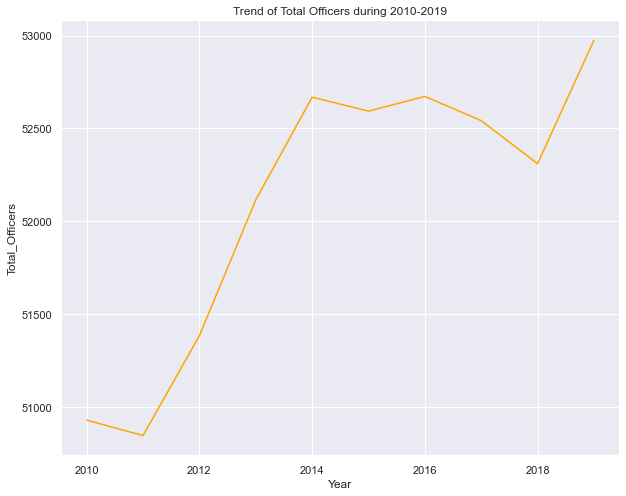

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data = police_sum, x = 'Year', y = 'Total_Officers', color = 'orange').set(title = 'Trend of Total Officers during 2010-2019')
plt.show()

Here we can see that generally the total number of police officers in California increased from 2010 to 2019 with a slight drop in 2011 and 2018 but continued to increase afterward. Then we chose to plot out the distribution of the number of police in all counties throughout these 10 years. As shown, the y-axis shows the number of times the range of the number of police appears in the dataset and the x-axis shows the range.

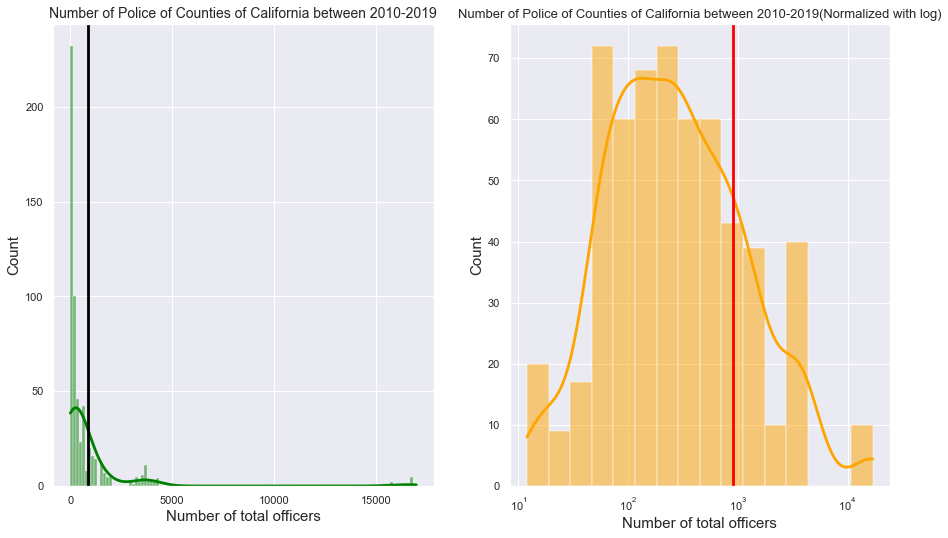

In [18]:
sns.set(rc={'figure.figsize':(15,8.5)})
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.style.use('seaborn-poster')

sns.histplot(data=police, x='Total_Officers', ax=ax1, kde=True, color='green')
ax1.set_xlabel('Number of total officers', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax1.set_title('Number of Police of Counties of California between 2010-2019', fontsize = 14)
ax1.axvline(x = police.Total_Officers.mean(), color = 'black')

sns.histplot(data=police, x='Total_Officers', ax=ax2, kde=True, color='orange', log_scale=True)
ax2.set_xlabel('Number of total officers', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
ax2.set_title('Number of Police of Counties of California between 2010-2019(Normalized with log)', fontsize = 13)
ax2.axvline(x = police.Total_Officers.mean(), color = 'red')
plt.show()

As shown in the right plot, the number of police in all counties of California in these
10 years have a right skew distribution. When we convert the plot to the log-scale version,
the distribution of the data is now roughly normal, with a mean around 1000 police.

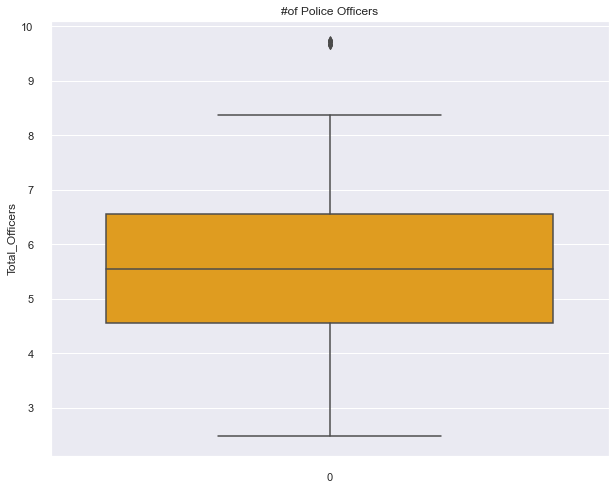

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
#draw boxplot to visualize outliers
sns.boxplot(data=np.log(police['Total_Officers']), color = 'orange').set(title='#of Police Officers', ylabel='Total_Officers')
plt.show()

In [20]:
#To check for outliers and see how many data is in the right most bin 
police[police['Total_Officers'] > 10000].shape[0]

10

## Income Dataset Exploratory Data Analysis and Visualization

For the Income data, we chose to plot the frequency of all incomes across all counties, first.

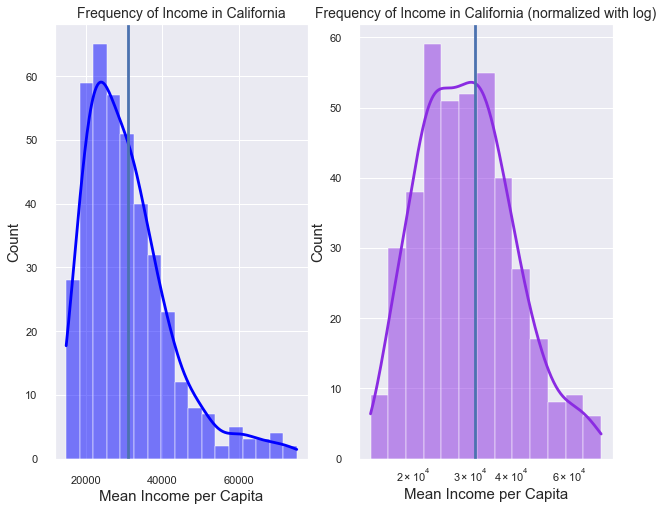

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.style.use('seaborn-poster')

sns.histplot(data=income, x='Mean Income Per Capita', ax=ax1, kde=True, color='blue')
ax1.set_xlabel('Mean Income per Capita', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax1.set_title('Frequency of Income in California', fontsize = 14)
ax1.axvline(x = income["Mean Income Per Capita"].mean())

sns.histplot(data=income, x='Mean Income Per Capita', ax=ax2, kde=True, color='blueviolet', log_scale=True)
ax2.set_xlabel('Mean Income per Capita', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
ax2.set_title('Frequency of Income in California (normalized with log)', fontsize = 14)
ax2.axvline(x = income["Mean Income Per Capita"].mean())


The figures above show us that our income is generally right-skewed. Using a log scale,
however, shows us that it is roughly normally distributed. There are not any significant outliers,
the highest average per county being somewhere around 80,000 per year, per capita. The average mean income is around 30,000 per year.

Next, we want to graph the sum of the incomes over time, to visualize how income has changed over the 10 years we are observing.

Text(0.5, 1.0, 'Yearly Income Trend')

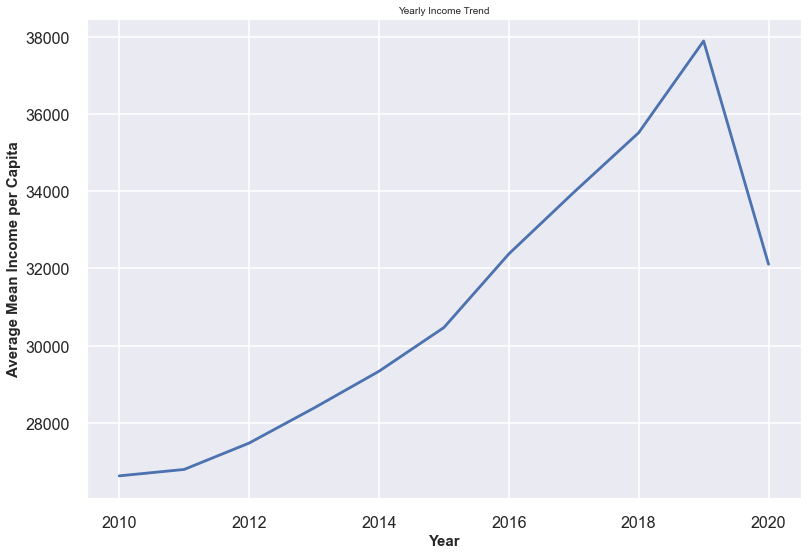

In [22]:
income_sum = income.copy()
income_sum["Mean Income Per Capita"] = income.groupby(["Year"])["Mean Income Per Capita"].transform(np.mean)

p = sns.lineplot(data=income_sum, x='Year', y="Mean Income Per Capita")
p.set_xlabel('Year', fontsize = 15, weight = 'bold')
p.set_ylabel('Average Mean Income per Capita', fontsize = 15, weight = 'bold')
p.set_title('Yearly Income Trend', fontsize = 10)

This graph shows us that over time, the average inflation-adjusted income in California has been steadily increasing. However, around 2019 (COVID-Era) that mean income sharply dropped.

To get a better picture, we can look at a boxplot of the income. Here, we see more clearly that the average income is slightly below 30,000, which is skewed towards lower incomes. We can also see that there are no significant outliers unless you count the one point around 77,000.

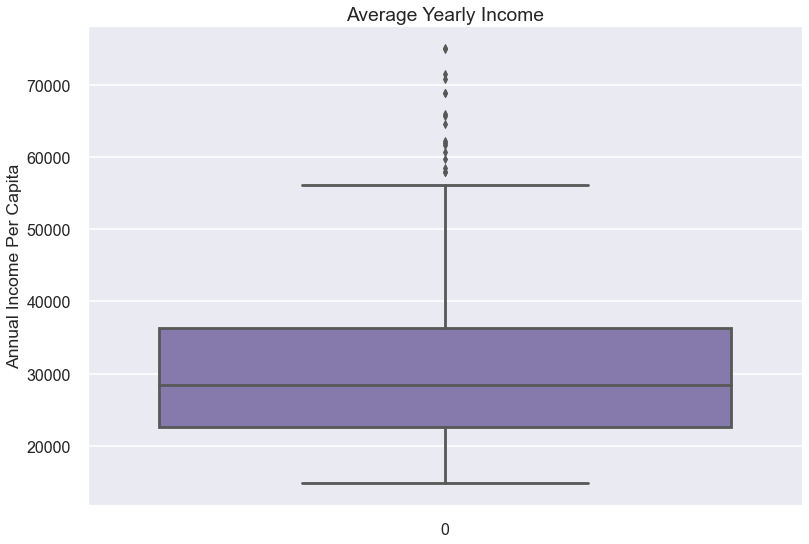

In [23]:
# Plot the Income's boxplot
sns.boxplot(data=income['Mean Income Per Capita'], color = 'm').set(title='Average Yearly Income', ylabel='Annual Income Per Capita')
plt.show()

## Weather Exploratory Data Analysis and Visualization

Since our weather dataset collects data from all 58 counties in california which are geospatially close in consecutive 10 years, we expect that the overall distribution of our data would show a normal trend. 

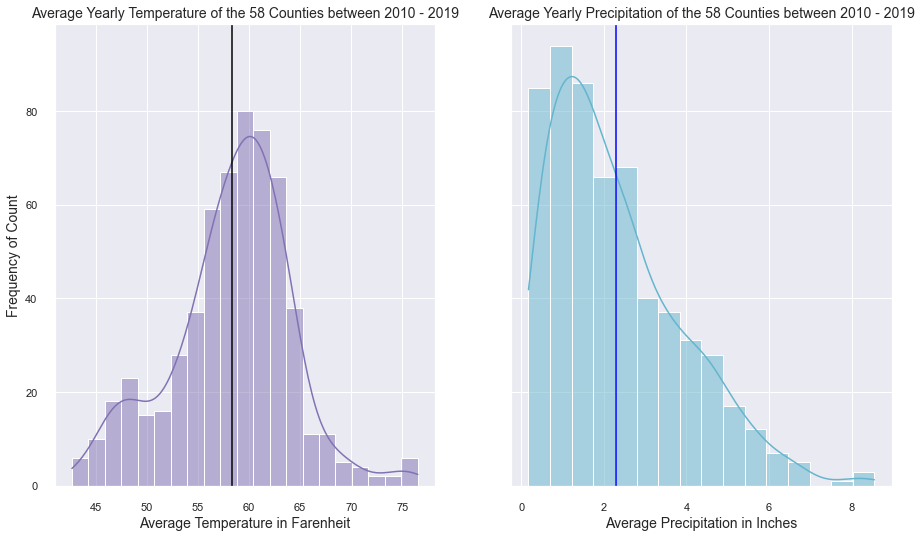

In [24]:
#plot the histograms of temperature
sns.set(rc={'figure.figsize':(15,8.5)})
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(data = weather['Avg_Temperature'], ax = ax1, kde = True, color = 'm')
ax1.set_xlabel('Average Temperature in Farenheit', size = 14)
ax1.set_title('Average Yearly Temperature of the 58 Counties between 2010 - 2019', size = 14)
ax1.set_ylabel('Frequency of Count', size = 14)
ax1.axvline(x = weather.Avg_Temperature.mean(), color = 'black')
##plot the histograms of precipitation
sns.histplot(data = weather['Avg_Precipitation'], ax = ax2, kde = True, color = 'c')
ax2.set_xlabel('Average Precipitation in Inches', size = 14)
ax2.set_title('Average Yearly Precipitation of the 58 Counties between 2010 - 2019', size = 14)
ax2.axvline(x = weather.Avg_Precipitation.mean(), color = 'Blue')
plt.show()

In the above graphs, we define frequency as the count of temperature/precipitation of the 58 counties from 2010 to 2019. In other words, a frequency of 60 for 56 Farenheit means that of all the 58 counties over the ten years, there were 60 times that a county's yearly average temperature was recorded as 56 Fahrenheit. The same definition of frequency applies to the precipitation graph. According to the above histograms, the distribution of yearly average temperature is almost Gaussian with a best-fitted line of a bell-shaped curve. The mean value of this distribution is around 58 Fahrenheit with the mode of 60. Unlike temperature, the distribution of yearly average precipitation is mostly centered around 0-2 inches(No precipitation to light rainfall) with a highly skew to 6-8 inches(heavy rainfall). The mean of the distribution is around 2.5 and the mode is around 1. For both distributions, there are a few outliers, we will visualize these values to get a better sense of our data. However, concerning the number of data we have, we will not remove those outliers but are aware of these values.

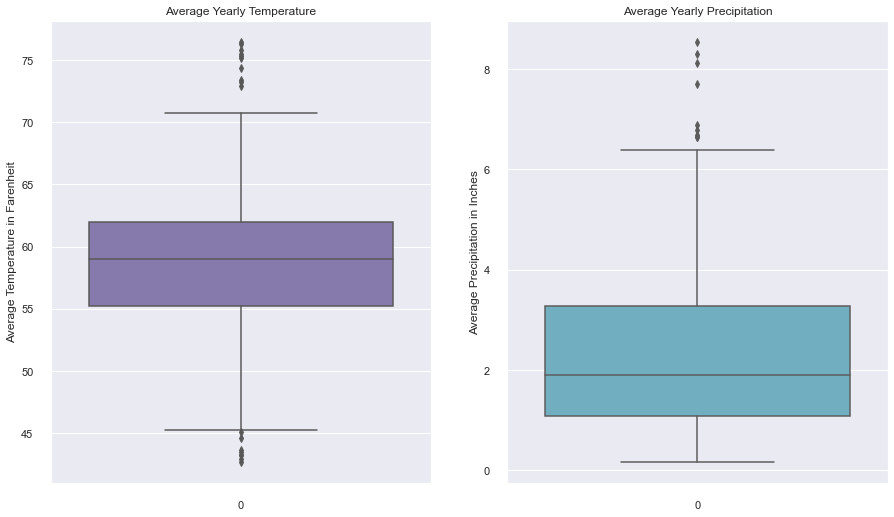

In [25]:
#plot the boxplot of temperature and precipitation to get a sense of the IQR and outliers
fig, (ax3, ax4) = plt.subplots(ncols = 2, sharey = False)
sns.boxplot(data=weather['Avg_Temperature'], ax = ax3, color = 'm').set(title='Average Yearly Temperature', ylabel='Average Temperature in Farenheit')
sns.boxplot(data=weather['Avg_Precipitation'], ax = ax4, color = 'c').set(title='Average Yearly Precipitation', ylabel='Average Precipitation in Inches')
plt.show()

The temperature distribution has outliers ranging from 45 to lower and 72 to higher while the precipitation distribution has outliers from 7.5 to higher. We will then look at the descriptive statistics of our temperature and precipitation dataset over the ten years.

In [26]:
#find the descriptive statistics of temperature across ten years
temp_stat = pd.DataFrame()
for i in range(2010, 2020):
    temp_stat[i] = weather[weather['Year'] == i]['Avg_Temperature'].describe()
temp_stat

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,56.521983,56.193822,58.034483,58.162644,60.316379,59.733621,58.885201,59.055891,58.769540,57.589224
std,5.764261,5.816219,5.788712,5.764682,5.733938,5.579523,5.793114,6.011645,5.788278,5.855798
min,42.900000,42.691667,45.100000,44.600000,46.800000,46.350000,45.900000,45.400000,45.716667,43.466667
25%,53.806250,53.370833,55.337500,55.664583,57.652083,56.718750,55.931250,56.175000,56.000000,54.608333
50%,57.104167,57.070833,58.795833,59.137500,61.075000,60.670833,59.658333,60.066667,59.766667,58.562500
75%,60.237500,59.925000,61.845833,61.908333,63.887500,63.054167,62.456250,62.822917,62.462500,61.462500
max,73.408333,73.283333,75.216667,74.358333,76.508333,75.858333,75.508333,76.333333,75.333333,72.916667


In [27]:
#find the descriptive statistics of precipitation across ten years
precip_stat = pd.DataFrame()
for i in range(2010, 2020):
    precip_stat[i] = weather[weather['Year'] == i]['Avg_Precipitation'].describe()
precip_stat

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,3.193132,2.004511,2.593218,0.739670,2.176681,1.465876,2.736264,3.118922,1.944210,3.040431
std,1.652230,1.114256,1.732823,0.474884,1.298571,1.058308,1.736522,1.883263,1.035203,1.533325
min,0.530833,0.210833,0.206667,0.197500,0.171667,0.184167,0.255000,0.235000,0.172500,0.313333
25%,2.036042,1.235625,1.214167,0.414792,1.172500,0.731042,1.478958,1.741250,1.196875,1.920833
50%,2.769167,1.681250,2.120000,0.556667,1.819167,1.164583,2.065417,2.513750,1.590000,2.632500
75%,4.311458,2.788958,3.744583,1.013125,3.245000,2.111250,3.972917,4.541250,2.828750,4.271042
max,8.293333,5.612500,8.551667,2.916667,5.596667,5.779167,8.132500,7.713333,4.538333,6.637500


By looking at the statistics of both distributions, here we can see that over the ten years, the mean of temperature dataset is always close to the median implying that the distribution of temperature in the ten years is always normal, moreover, based on the statistics, the temperature was almost steady in every aspect across the ten years while precipitation fluctuates more. Also, it should be pointed out the outliers(>6.5) in the precipitation dataset happened in 2010, 2012, 2016, and 2019. Knowing the yearly overall trend of the distribution of temperature and precipitation, let's continue to explore the data by visualizing the top 5 counties for temperature and precipitation separately.  

In [28]:
weather.groupby('County').mean().sort_values('Avg_Temperature', ascending = False).head(5)

,Year,Avg_Temperature,Avg_Precipitation
County,,,
imperial,2014.5,74.872500,0.258000
riverside,2014.5,69.310000,0.636917
san bernardino,2014.5,67.411667,0.539083
orange,2014.5,65.165833,0.954667
kings,2014.5,64.780833,0.584833


In [29]:
weather.groupby('County').mean().sort_values('Avg_Precipitation', ascending = False).head(5)

,Year,Avg_Temperature,Avg_Precipitation
County,,,
del norte,2014.5,52.782500,6.377167
humboldt,2014.5,54.806667,5.084750
trinity,2014.5,53.430833,4.640750
nevada,2014.5,53.055000,4.421417
mendocino,2014.5,56.184167,4.251167


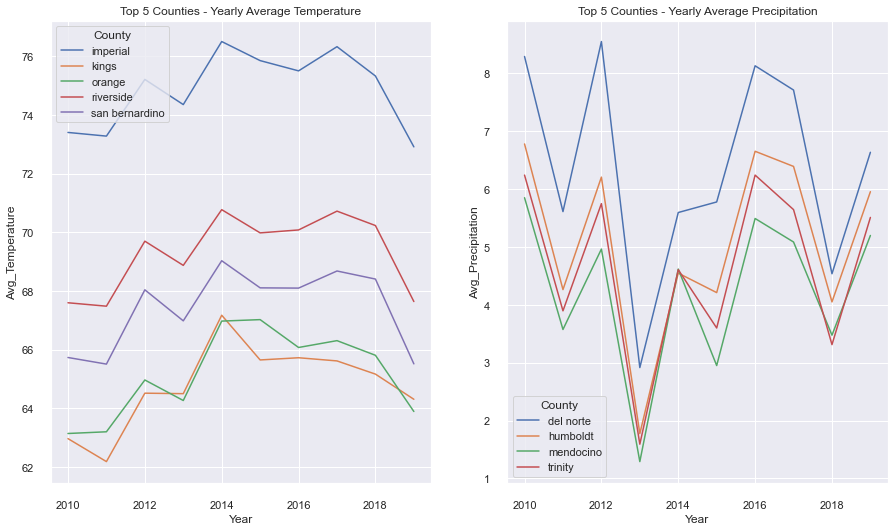

In [30]:
#Generating line plots for temperature and precipitation
topfivetemp = ['imperial', 'riverside', 'san bernardino', 'orange', 'kings']
topfiveprecip = ['del norte', 'humboldt', 'trinity', 'nevade', 'mendocino']
topfivetemp_df = weather[weather['County'].isin(topfivetemp)]
topfiveprecip_df = weather[weather['County'].isin(topfiveprecip)]
fig, (axtemptop, axpreciptop) = plt.subplots(ncols = 2, sharey = False)
sns.lineplot(data=topfivetemp_df, x='Year', y='Avg_Temperature', hue='County', ax = axtemptop).set(title = 'Top 5 Counties - Yearly Average Temperature')
sns.lineplot(data=topfiveprecip_df, x='Year', y='Avg_Precipitation', hue='County', ax = axpreciptop).set(title = 'Top 5 Counties - Yearly Average Precipitation')
plt.show()

In these line plots, we are plotting the average yearly temperature/precipitation for the top five counties. In the temperature line plot, we can see that the overall trend is slightly positive with a little spike in 2014, whereas in the precipitation plot, there is a dramatic drop in 2013 and all five counties started increasing after that. In both plots, the ranking of the counties does not change, hence, we deduct these counties are reflective of other counties as well.

## Crime Dataset Exploratory Data Analysis and Visualization

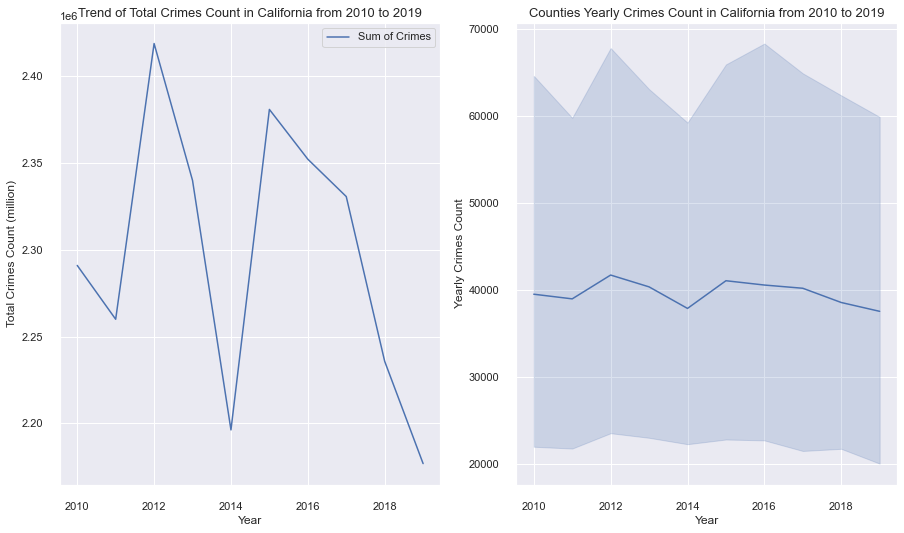

In [31]:
fig, (crimevisual, crimevisual2) = plt.subplots(ncols = 2, sharey = False)
sns.lineplot(data = crime.groupby('Year').sum(), ax = crimevisual)
crimevisual.set_title('Trend of Total Crimes Count in California from 2010 to 2019', size = 13)
crimevisual.set_ylabel('Total Crimes Count (million)')
sns.lineplot(data = crime, x = 'Year', y = 'Sum of Crimes', ax = crimevisual2)
crimevisual2.set_title('Counties Yearly Crimes Count in California from 2010 to 2019', size = 13)
crimevisual2.set_ylabel('Yearly Crimes Count')
plt.show()

Here we can see that the general trend of the total crimes count reported yearly in California is decreasing from 2010-2019 with a steep drop in 2014(Figure left). When plotting counties' yearly reports (Figure right), we can see that the overall trend for county-based crimes count is slightly decreasing as well.

## Population Density Dataset Exploratory Data Analysis and Visualization

The population density is the total number of individuals living within a specific location. We were able to find the population density by taking the total population of each county in California and dividing it by the total square miles per county. Since the population density refers to the total number of individuals living within a specific location, we would expect a clear trend in our data. However, it would be useful to visualize the general trend of the total population density within our timeframe data gathered from 2010-2019. To do this, we will sum our population density by each year and generate a line plot illustrating the years on the x-axis and population density on the y-axis.

In [32]:
population_density_sum = population_density.groupby('Year').sum()
population_density_sum.head()

,Population Density
Year,
2010,38430
2011,38849
2012,39325
2013,39762
2014,40216


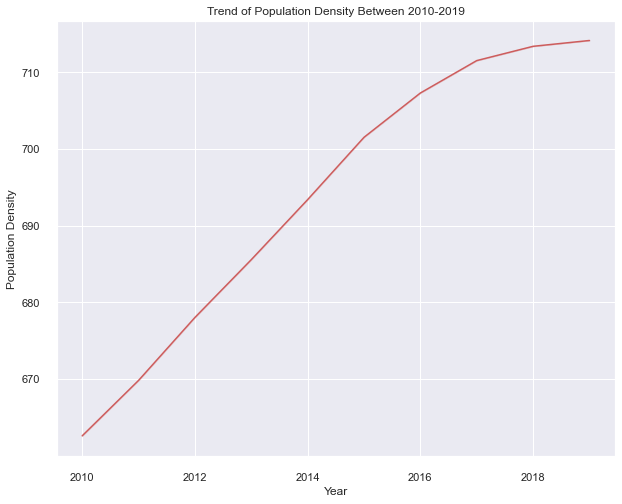

In [33]:
population_density_sum = population_density.copy()
population_density_sum['Population Density'] = population_density.groupby(["Year"])["Population Density"].transform(np.mean)

sns.set(rc={'figure.figsize':(10,8)})
sns.lineplot(data = population_density_sum, x = 'Year', y = 'Population Density', color = 'indianred').set(title = 'Trend of Population Density Between 2010-2019')
plt.show()


In our generated graph above, we can see the trend of population density between our gathered years of 2010 to 2019 to have a constant increase as the years progress. 

In order to get a better idea of all of our gathered data, we chose to plot the frequency of all population densities across all counties gathered.

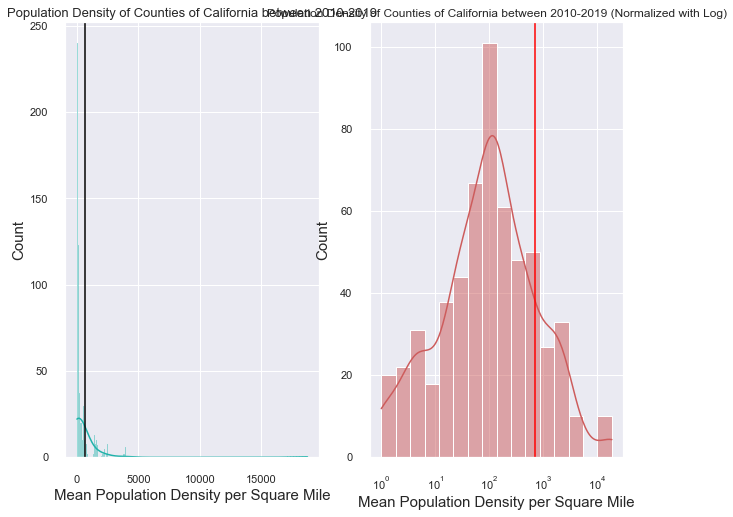

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.style.use('seaborn-poster')
sns.set(rc={'figure.figsize':(15,8.5)})

sns.histplot(data = population_density, x = 'Population Density', ax=ax1, kde=True, color='lightseagreen')
ax1.set_xlabel('Mean Population Density per Square Mile', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax1.set_title('Population Density of Counties of California between 2010-2019', fontsize = 13)
ax1.axvline(x = population_density["Population Density"].mean(), color = 'black')

sns.histplot(data = population_density, x='Population Density', ax=ax2, kde=True, color='indianred', log_scale=True)
ax2.set_xlabel('Mean Population Density per Square Mile', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
ax2.set_title('Population Density of Counties of California between 2010-2019 (Normalized with Log)', fontsize = 12)
ax2.axvline(x = population_density["Population Density"].mean(), color = 'red')

In our generated graphs above, on the left, we can see the frequency of population density in California having a right-skewed distribution. Whereas, there is a normal skewed distribution in our log scale generated graph on the right.

To get a better picture, we generated a boxplot of the population density.

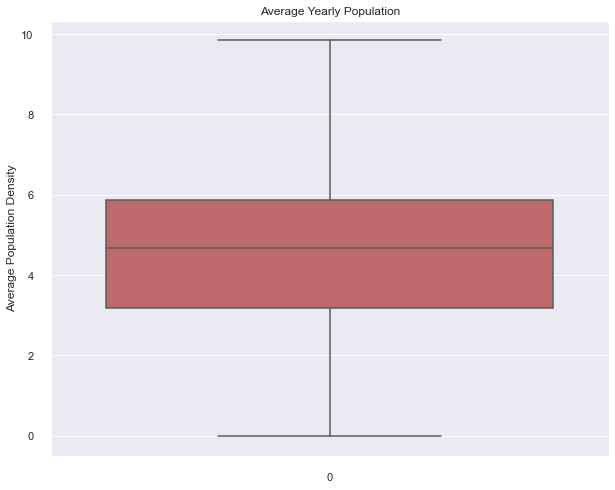

In [35]:
# Plot of the Population Density Boxplot

sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data=np.log(population_density['Population Density']), color = 'indianred').set(title='Average Yearly Population', ylabel='Average Population Density')
plt.show()

When looking at our population density boxplot we can see that there are no outliers and this could be due to the constant increase in population over the course of our ten-year dataset (2010-2019).

# Correlation

In this part, we will be plotting the four datasets which represent four different independent variables(police, weather, income, population density) against our crime dataset respectively to find the relationship between the independent variables and the dependent variables. In order to display the correlation as well as the strength of correlation of our quantitative variables, we will be mostly using scatterplots.

## Police & Crimes

We begin by merging the data of crimes and the number of police on county name and year. We will make yearly scatterplots of numbers of crimes against the number of total officers in California as well as an overall plot generalizing the relationship of crimes and police from 2010 to 2019.

In [36]:
#First merging the police and crime data
crime_police = police.merge(crime)
crime_police = crime_police.assign(log = np.log(crime_police['Total_Officers']))
crime_police

,County,Total_Officers,Year,Sum of Crimes,log
0,alameda,1635,2010,121582,7.399398
1,butte,258,2010,13404,5.552960
2,contra costa,952,2010,70012,6.858565
3,el dorado,346,2010,6530,5.846439
4,fresno,891,2010,88748,6.792344
...,...,...,...,...,...
575,sierra,12,2019,64,2.484907
576,siskiyou,103,2019,1634,4.634729
577,tehama,107,2019,3758,4.672829
578,trinity,50,2019,596,3.912023


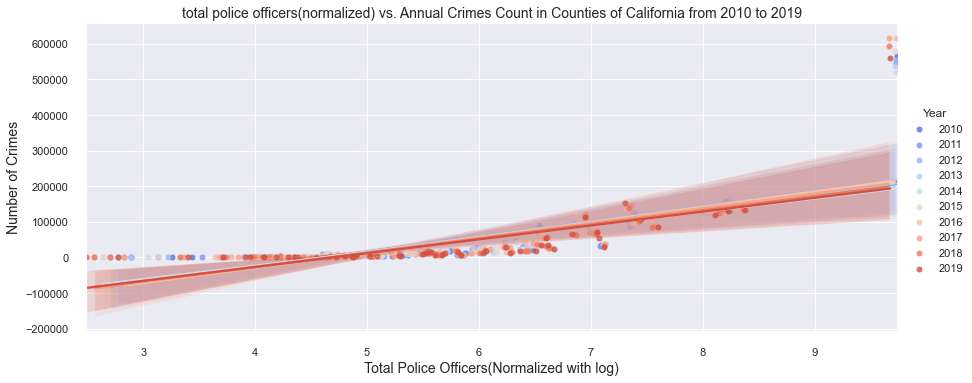

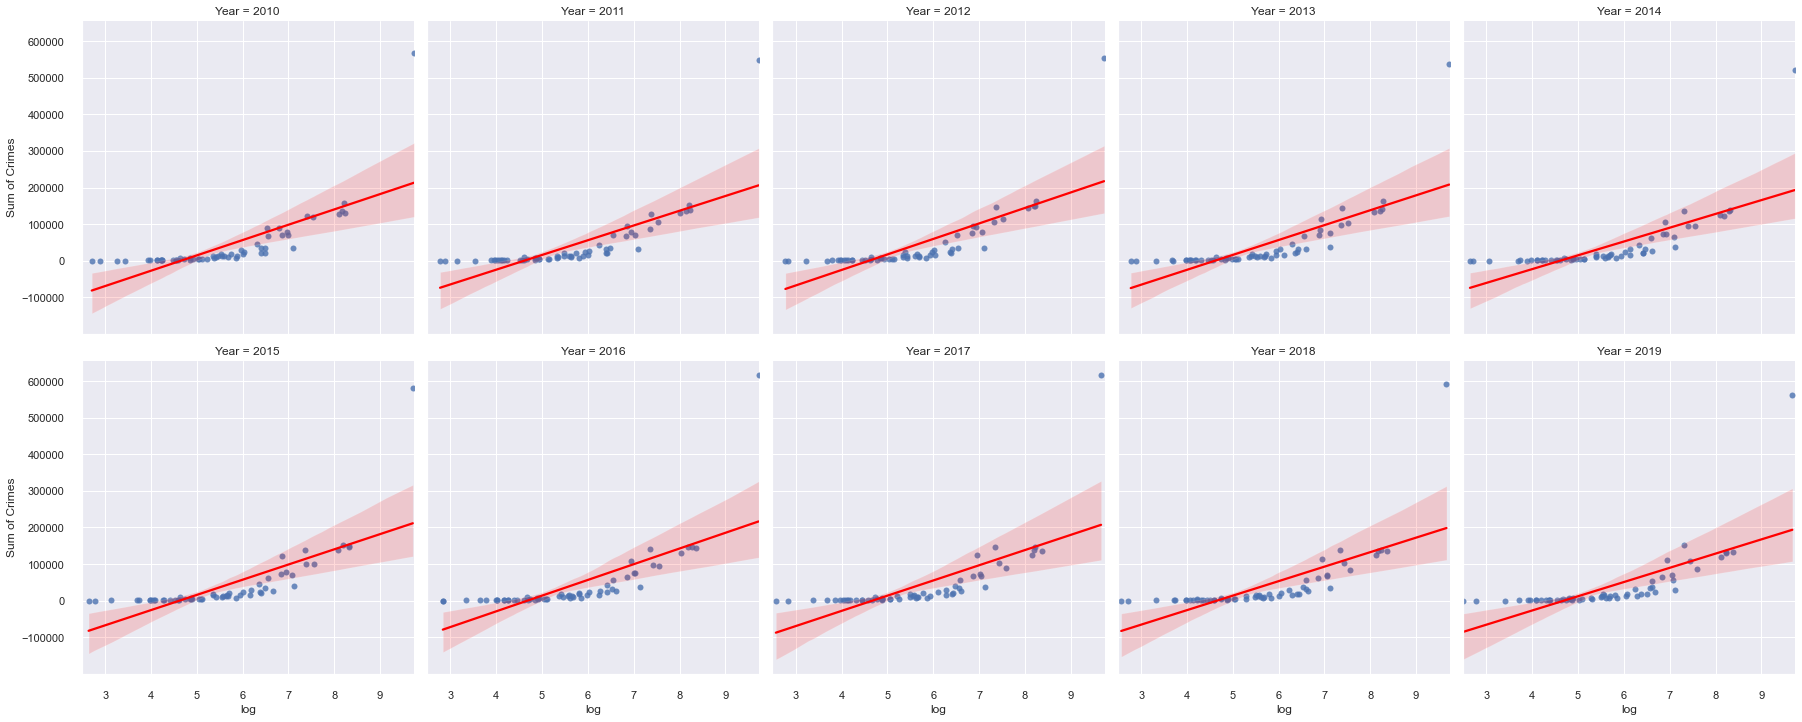

In [37]:
sns.lmplot(data=crime_police, 
           x="log", 
           y="Sum of Crimes", 
           hue = 'Year', 
           palette = sns.color_palette("coolwarm", 10),
           aspect = 2.5
)
plt.title('total police officers(normalized) vs. Annual Crimes Count in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Total Police Officers(Normalized with log)', size = 14)
plt.ylabel('Number of Crimes', size = 14)


sns.lmplot(data=crime_police, 
           x="log", 
           y="Sum of Crimes", 
           col="Year", 
           col_wrap=5, 
           line_kws={'color': 'red'},
)

plt.show()

The first plot is generated to see the correlation between log( ) of total officers and number of crimes in <b> each </b> years. As shown in the plots, a relatively strong positive correlation could be observed, meaning that more police correlates with more crimes committed. An outlier is observed on the right-top corner of the graph. This is due to the fact that Los Angeles has more police officers and more crime is occurring in Los Angeles county. We could also observe that the slope of all the best fit lines did not vary much, implying that the more-police-more-crime is relatively steady throughout these 10 years. The second set of plots is the breakdown of the first general plot.

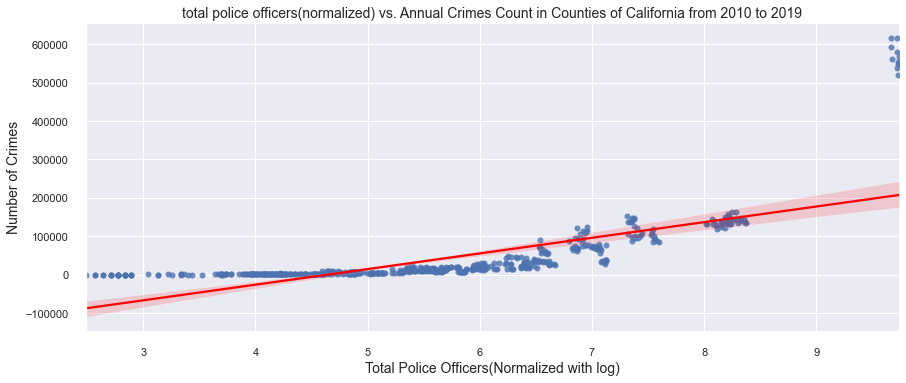

In [38]:
sns.lmplot(data=crime_police, 
           x="log", 
           y="Sum of Crimes", 
           line_kws={'color': 'red'},
           aspect = 2.5)
plt.title('total police officers(normalized) vs. Annual Crimes Count in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Total Police Officers(Normalized with log)', size = 14)
plt.ylabel('Number of Crimes', size = 14)
plt.show()

The above plot's purpose is to see the correlation between log( ) of total officers and the number of crimes in <b>all</b> 10 years. Similarly, a positive correlation is presented but stronger as the margin of error (indicated by the shaded area next to the best-fit line) is smaller. This means that when looking at the general data of the number of police and crimes of all counties, the more-police-more-crime correlation is more steady. There are also outliers in this plot,
which is also due to the fact of the massive amount of police officers as well as the number of crimes in Los Angeles county.

## Weather & Crimes

We will now merge our weather dataset with the crime dataset in order to find their relationship,
luckily our two datasets perfectly merged together with no null values, meaning our county names are consistent.

In [39]:
weather_crime = weather.merge(crime, how = 'left')
weather_crime.isnull().sum()

Year                 0
County               0
Avg_Temperature      0
Avg_Precipitation    0
Sum of Crimes        0
dtype: int64

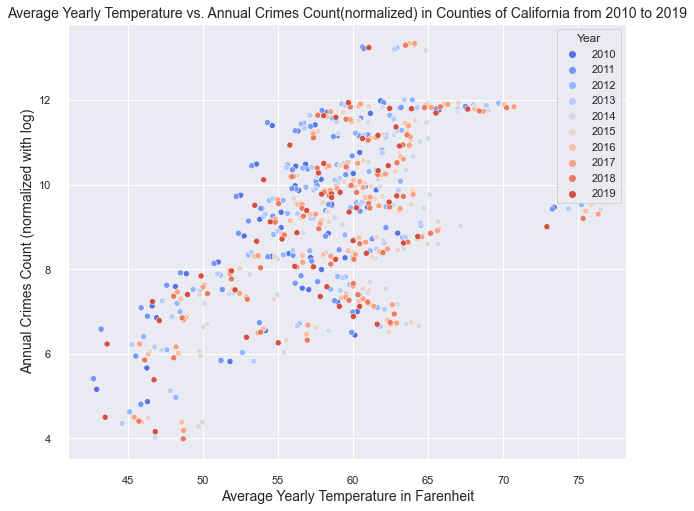

In [40]:
weather_crime['logcrime'] = np.log(weather_crime['Sum of Crimes'])
sns.scatterplot(data = weather_crime, 
                x = 'Avg_Temperature', 
                y = 'logcrime', 
                hue = 'Year', 
                palette = sns.color_palette("coolwarm", 10))
plt.title('Average Yearly Temperature vs. Annual Crimes Count(normalized) in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Average Yearly Temperature in Farenheit', size = 14)
plt.ylabel('Annual Crimes Count (normalized with log)', size = 14)
plt.show()

From this graph we can see that the annual crimes count(logged) is somehow linearly correlated with average yearly temperature with a positive slope, meaning that warmer temperature correlates with more crimes committed. However, observing that red dots(data from 2019) are the blue dots(data from 2010) horizontally shifted to the right further implies that the crime count didn't increase nor decrease while the average yearly temperature increased, hence we have to admit that even if there is a correlation, the correlation coefficient between temperature and crimes count wouldn't be so strong. Let's further explore the correlation of crimes and temperature by drawing yearly best-fitted lines.

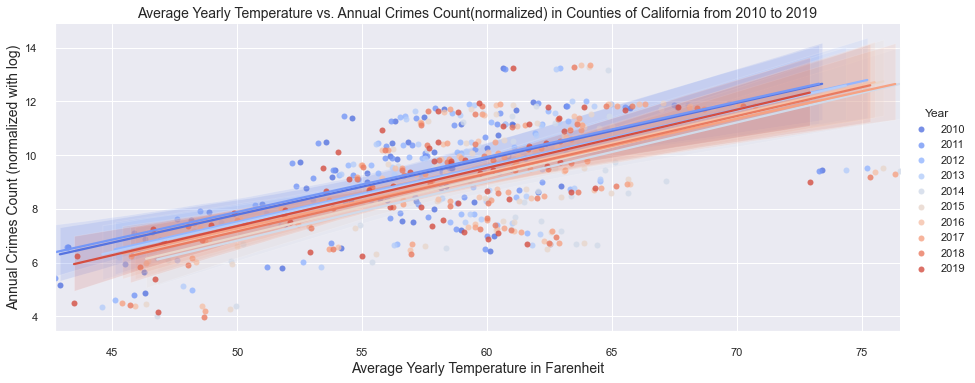

In [41]:
sns.lmplot(data = weather_crime, 
                x = 'Avg_Temperature', 
                y = 'logcrime', 
                hue = 'Year', 
                palette = sns.color_palette("coolwarm", 10),
          aspect = 2.5)
plt.title('Average Yearly Temperature vs. Annual Crimes Count(normalized) in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Average Yearly Temperature in Farenheit', size = 14)
plt.ylabel('Annual Crimes Count (normalized with log)', size = 14)
plt.show()

We can see that best-fitted lines drawn yearly(blue ~ red = 2010 ~ 2019) all have the same slope while the y-intercept lowered. This can be explained by the total number of crimes decreased from 2010 to 2019 in California. Similarly, Let's visualize the average yearly precipitation against crimes using the same approach.

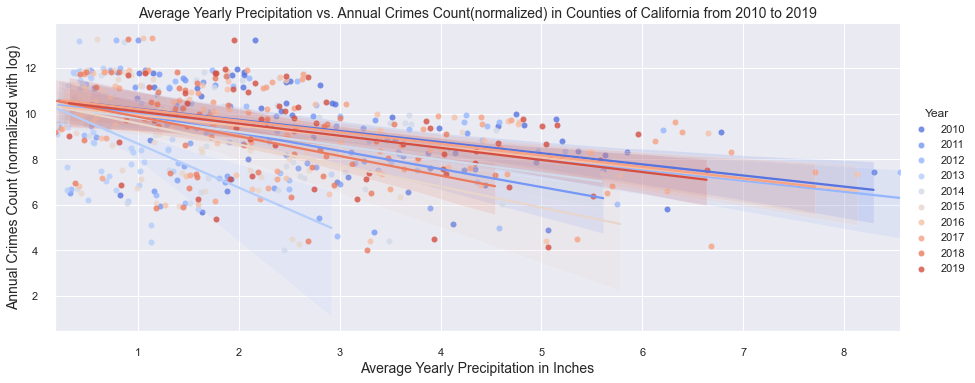

In [42]:
sns.lmplot(data = weather_crime, 
                x = 'Avg_Precipitation', 
                y = 'logcrime', 
                hue = 'Year', 
                palette = sns.color_palette("coolwarm", 10),
          aspect = 2.5)
plt.title('Average Yearly Precipitation vs. Annual Crimes Count(normalized) in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Average Yearly Precipitation in Inches', size = 14)
plt.ylabel('Annual Crimes Count (normalized with log)', size = 14)
plt.show()

Unlike temperature, average yearly precipitation shows a negative correlation with annual crimes count. In other words, heavy rainfalls correlate with fewer crimes count which is reasonable. Furthermore, yearly best-fitted lines do not overlap much which implies that the correlation coefficient of precipitation and crime count is weaker than that of temperature and crime count.

## Income & Crimes

To compare income and crimes, we need to combine the datasets. 

In [43]:
income_crime = income.merge(crime, how = 'left')
income_crime = income_crime.dropna()
income_crime = income_crime.assign(log = np.log(income_crime['Mean Income Per Capita']))
income_crime

,County,Mean Income Per Capita,Year,Sum of Crimes,log
0,alameda,32398,2010,121582.0,10.385852
1,butte,22263,2010,13404.0,10.010681
2,contra costa,34977,2010,70012.0,10.462446
3,el dorado,33111,2010,6530.0,10.407621
4,fresno,19083,2010,88748.0,9.856553
...,...,...,...,...,...
394,stanislaus,26686,2019,34364.0,10.191894
395,sutter,30411,2019,5530.0,10.322560
396,tehama,26932,2019,3758.0,10.201070
397,tulare,23096,2019,24634.0,10.047415


Here, we can see the relationship between income and crimes. Our graphs show that there is a consistent slightly positive correlation between crimes and income each year. This consistency implies that this correlation of high-crime-high-income is consistent throughout time. While this graph does not show correlations within counties, it suggests that we can expect to see wealthier counties have higher crime rates than lower-income ones. 

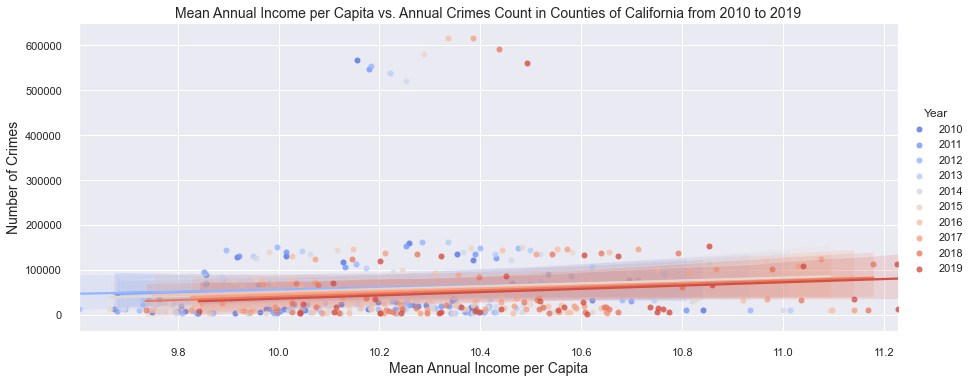

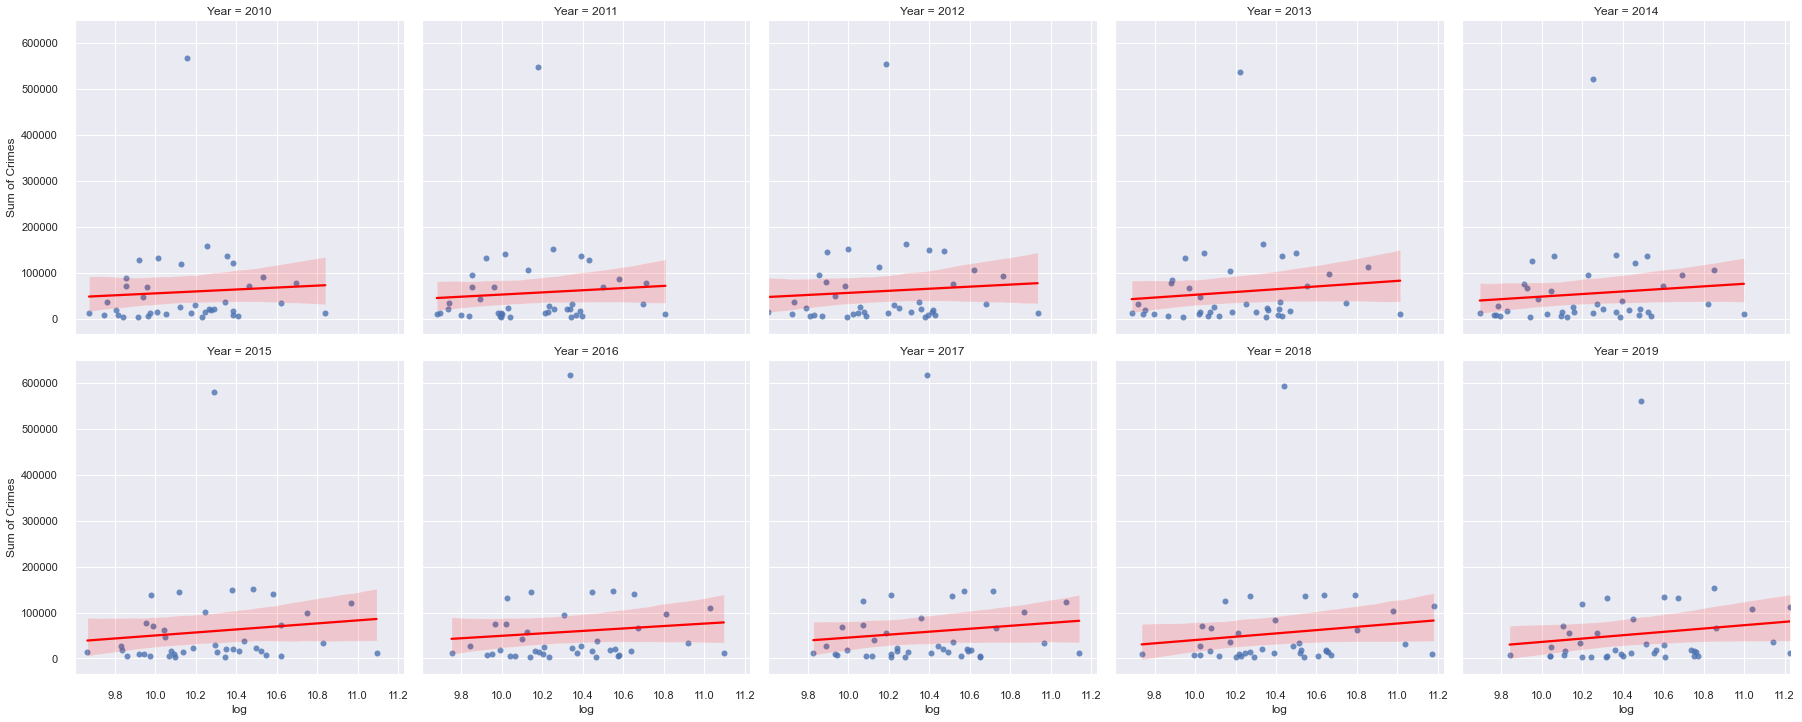

In [44]:
sns.lmplot(data=income_crime, 
           x="log", 
           y="Sum of Crimes", 
           hue = 'Year', 
           palette = sns.color_palette("coolwarm", 10),
           aspect = 2.5
)
plt.title('Mean Annual Income per Capita vs. Annual Crimes Count in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Mean Annual Income per Capita', size = 14)
plt.ylabel('Number of Crimes', size = 14)


sns.lmplot(data=income_crime, 
           x="log", 
           y="Sum of Crimes", 
           col="Year", 
           col_wrap=5, 
           line_kws={'color': 'red'},
)

plt.show()

## Population Density & Crimes

In order to compare the population density and crimes we first need to merge the datasets.

In [45]:
#Merging Population Density and Crime
population_density_crime = population_density.assign(Year = population_density['Year'].apply(int))
population_density_crime = population_density_crime.merge(crime)
population_density_crime = population_density_crime.assign(Log = np.log(population_density_crime['Population Density']))
population_density_crime

,County,Year,Population Density,Sum of Crimes,Log
0,alameda,2010,2047,121582,7.624131
1,alameda,2011,2071,126888,7.635787
2,alameda,2012,2102,148058,7.650645
3,alameda,2013,2137,143744,7.667158
4,alameda,2014,2175,135952,7.684784
...,...,...,...,...,...
575,yuba,2015,117,4662,4.762174
576,yuba,2016,118,4524,4.770685
577,yuba,2017,121,4794,4.795791
578,yuba,2018,122,4394,4.804021


In order to show the correlation between the population density and sum of crimes we created a graph illustrating the best fitted lines.

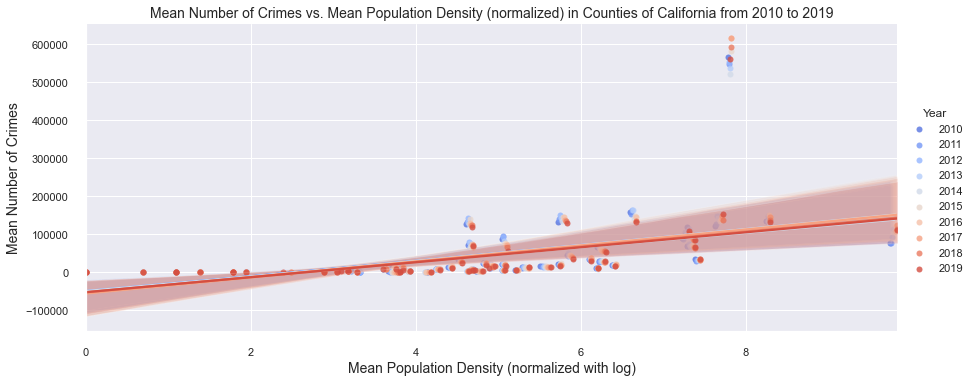

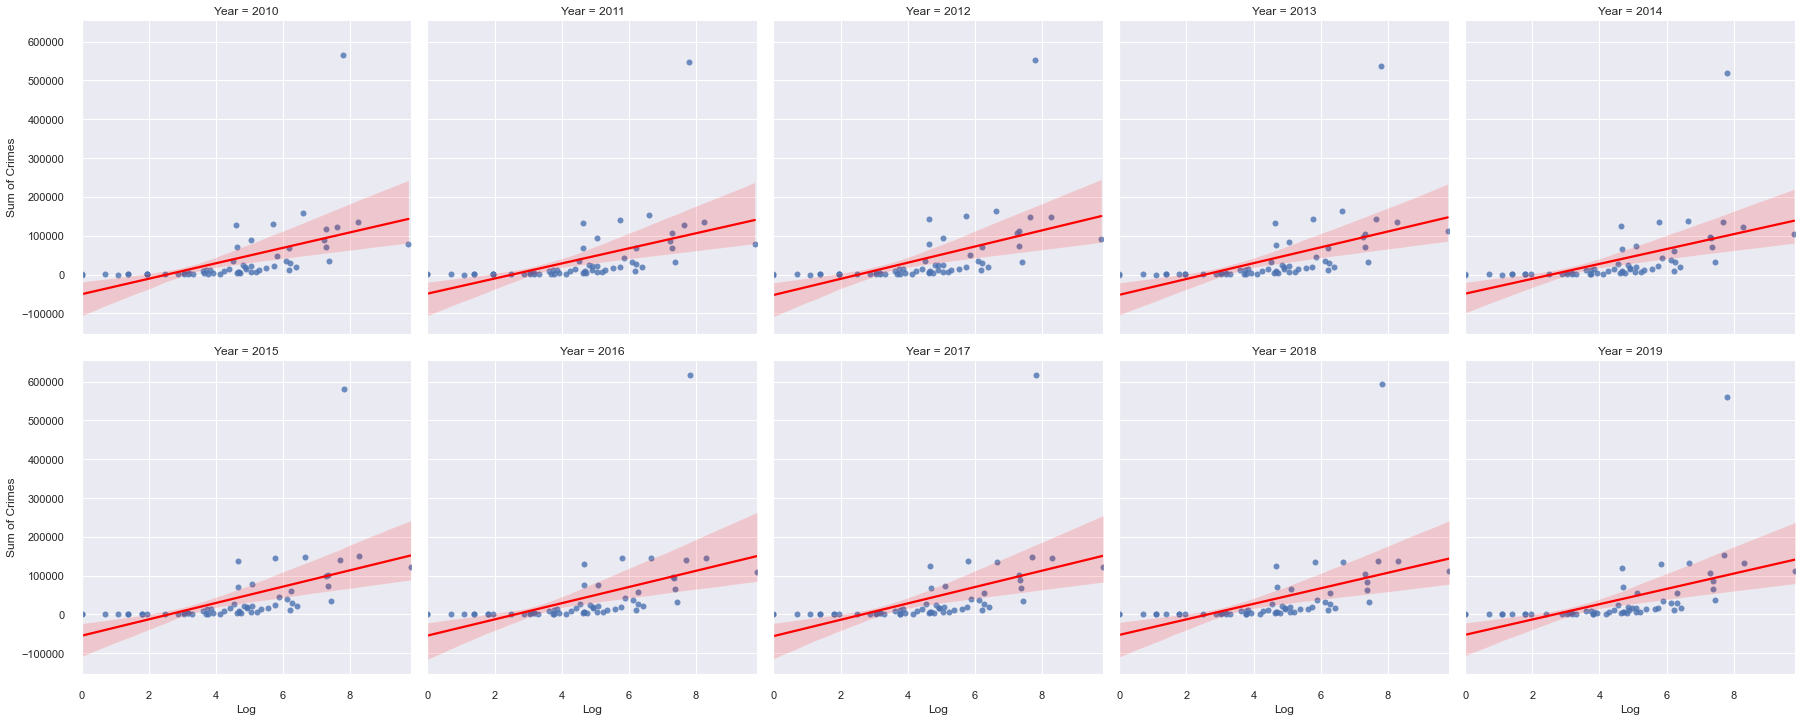

In [46]:
sns.lmplot(data = population_density_crime, 
           x = "Log", 
           y = "Sum of Crimes", 
           hue = 'Year', 
           palette = sns.color_palette("coolwarm", 10),
           aspect = 2.5
)
plt.title('Mean Number of Crimes vs. Mean Population Density (normalized) in Counties of California from 2010 to 2019', size = 14)
plt.xlabel('Mean Population Density (normalized with log)', size = 14)
plt.ylabel('Mean Number of Crimes', size = 14)


sns.lmplot(data = population_density_crime, 
           x = "Log", 
           y = "Sum of Crimes", 
           col = "Year", 
           col_wrap = 5, 
           line_kws = {'color': 'red'},
)

plt.show()

When looking at our best-fitted line between the yearly population density and the annual crime count we can see that all of the years between our gathered data from 2010 to 2019 have a very similar slope. This can be explained due to the increasing normalized trend in population density.

# K-fold Cross Validation

Since we have a small quantity of data, we want to maximize our usage of the data without the risk of overfitting. We decided to use a 5-fold cross-validation by randomly splitting our dataset into 5 smaller sets, using 1 partition to be the test set and the other 4 as the training sets. We repeat this 5 times, giving each subset a chance to be the test set.

In order to perform a k-fold Cross-Validation of all variables, we need to merge them into one large set, and then separate them by year to avoid strong bias. We can then do the K-fold Cross-Validation on each year of data, and re-merge them.

In [47]:
# Collect and merge the relevant datasets
data_frames = [weather, police, income, population, population_density, crime]
df = reduce(lambda  left,right: pd.merge(left,right,on=['County', 'Year'],
                                            how='left'), data_frames)

# Drop Nulls
df = df.dropna().reset_index(drop=True)

# Drop the county column
df = df.drop("County", 1)

df = df.drop(columns = ['Population', 'Avg_Precipitation'])
df.head()

,Year,Avg_Temperature,Total_Officers,Mean Income Per Capita,Population Density,Sum of Crimes
0,2010,58.283333,1635,32398.0,2047,121582
1,2010,58.575000,258,22263.0,134,13404
2,2010,58.950000,952,34977.0,1470,70012
3,2010,52.733333,346,33111.0,106,6530
4,2010,54.608333,891,19083.0,156,88748


Since we want to keep a ratio of a train: test = 0.8:0.2, we will use 5-fold cross-validation so that the test size is always 20% of the data. In the following cell, we split the data into 5 train-test sets using kFold split.

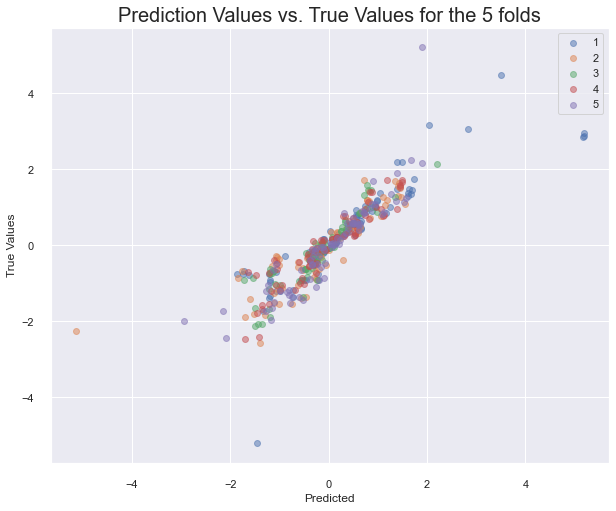

Avg RMSE: 45633.01968611946
Avg MAE: 4727.418025386765
Avg R^2: 0.8032852405389231


In [60]:
# The number of clusters
K = 5

# Split the data yearly
years = [df[df.Year == year] for year in df.Year.unique()]

# Create the Stratified 5-fold Cross Validation Partitions
kf = KFold(n_splits=K, shuffle=True)
regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=310, output_distribution="normal"),
)


# The accuracy of each fold
mse_scores = []
mae_scores = []
rsquare = []

# The Training and Testing Sets
X_train, X_test = [pd.DataFrame() for i in range(K)], [pd.DataFrame() for i in range(K)]
y_train, y_test = [pd.DataFrame() for i in range(K)], [pd.DataFrame() for i in range(K)]

# For each year, extract all 5 clusters
for i in range(len(years)):

    # Split into the crime and non-crime components
    X = years[i].iloc[:,:-1].reset_index(drop=True)
    y = years[i].iloc[:,-1].reset_index(drop=True)
    

    # The current cluster
    k = 0

    # Obtain the training and testing sets
    for train_index, test_index in kf.split(X, y):
        X_train[k] = pd.concat([X_train[k], X.iloc[train_index,: ]])
        X_test[k] = pd.concat([X_test[k], X.iloc[test_index,: ]])
        y_train[k] = pd.concat([y_train[k], y[train_index]])
        y_test[k] = pd.concat([y_test[k], y[test_index]])

        # Increment the cluster
        k += 1

# Graph Creation
fig, ax = plt.subplots()

# For each cluster, train the model
for i in range(K):
    
    # transform data using quantile transformer
    qt_X = QuantileTransformer(n_quantiles=210, output_distribution='normal').fit(X_train[i])
    X_train[i] = qt_X.transform(X_train[i])
    X_test[i] = qt_X.transform(X_test[i])
    qt_Y = QuantileTransformer(n_quantiles=70, output_distribution='normal').fit(y_train[i])
    y_train[i] = qt_Y.transform(y_train[i])
    y_test[i] = qt_Y.transform(y_test[i])
    
    # Fit the model to the data
    model = regr_trans.fit(X_train[i], y_train[i])
    
    # Make a prediction
    pred_values = model.predict(X_test[i])

    #reverse transformed predicted values
    pred_values_inverse = qt_Y.inverse_transform(pred_values)

    # Find the mean squared error and median absolute error of the cluster's model
    mse = mean_squared_error(pred_values_inverse, qt_Y.inverse_transform(y_test[i]))
    mse_scores.append(mse)
    mae = median_absolute_error(pred_values_inverse,qt_Y.inverse_transform(y_test[i]))
    mae_scores.append(mae)
    r = r2_score(qt_Y.inverse_transform(y_test[i]), pred_values_inverse)
    rsquare.append(r)
    
    #Visualize the predicted values
    ax.scatter(pred_values, y_test[i], label=i+1, alpha=0.5)

# Set the graph Legend, Labels, and Title
ax.legend()
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title("Prediction Values vs. True Values for the 5 folds", fontsize = 20)
plt.show()

# Find the average error across the models
avg_mse_score = sum(mse_scores) / K
avg_mae_score = sum(mae_scores) /K

# Print the resultant average accuracies
#print('MSE of each fold - {}'.format(mse_scores))
#print('Avg MSE : {}'.format(avg_mse_score))
print("Avg RMSE:", np.sqrt(avg_mse_score))
print("Avg MAE:", avg_mae_score)
print('Avg R^2:', np.mean(rsquare))

Let's print out an example of the split dataset to get a better sense of it.
The following cell prints the last set of the train:test partitioning.
Note that the splitted data are already transformed using quantile transformer instance but will be reversely transformed back when calculating RMSE, MAE, etc.

In [49]:
print("X_train")
display(pd.DataFrame(X_train[0]))
print("X_test")
display(pd.DataFrame(X_test[0]))
print("y_test")
display(pd.DataFrame(y_test[0]))
print("y_train")
display(pd.DataFrame(y_train[0]))

X_train


,0,1,2,3,4
0,-5.199338,-0.362669,1.045611,0.330504,1.334986
1,-5.199338,-0.265313,-0.652992,-0.771718,-0.323375
2,-5.199338,-0.188106,0.530783,0.584560,0.907868
3,-5.199338,-1.543020,0.465886,-1.333116,-0.174791
4,-5.199338,2.219251,-0.561932,-5.199338,-1.669325
...,...,...,...,...,...
314,5.199338,0.812113,-1.900128,0.137971,-0.066012
315,5.199338,-0.226441,-2.226111,-0.212971,-5.199338
316,5.199338,-1.723353,0.453456,-0.589216,-0.890485
317,5.199338,-0.508000,0.855373,0.957040,0.413966


X_test


,0,1,2,3,4
0,-5.199338,-2.124966,-0.242688,0.425751,-0.685826
1,-5.199338,-1.821234,-0.821286,-0.584021,-1.864861
2,-5.199338,0.694161,-0.913397,-1.977553,-0.520277
3,-5.199338,0.159464,5.199338,-0.321336,1.488312
4,-5.199338,-1.562754,-1.209672,-1.170255,-2.059056
...,...,...,...,...,...
75,5.199338,-0.904778,-1.995821,-0.445529,-1.106781
76,5.199338,-1.929096,0.053123,1.387655,0.176318
77,5.199338,1.677826,1.627944,0.135509,0.302083
78,5.199338,-0.411993,0.412012,2.254721,1.290928


y_test


,0
0,-1.056653
1,-0.749623
2,-0.995698
3,2.829560
4,-1.872292
...,...
75,-0.987293
76,-0.444038
77,1.271150
78,0.350901


y_train


,0
0,1.143159
1,-0.447565
2,0.603583
3,0.823926
4,-0.497106
...,...
314,-1.285581
315,-2.006840
316,0.099793
317,0.192481


Let's Visualize the prediction results and the real results for the last fold

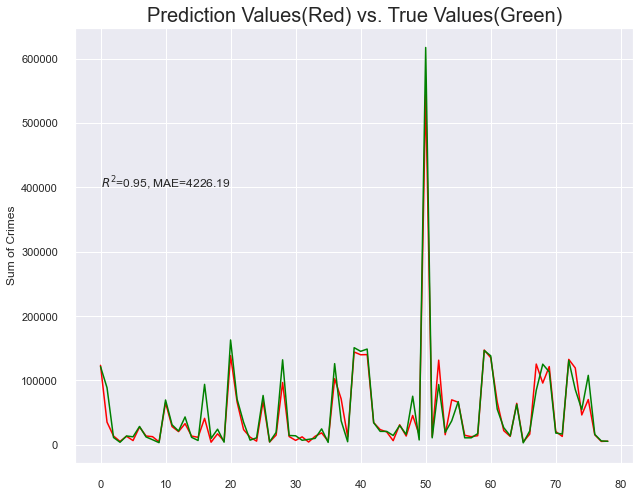

In [55]:
plt.plot(pred_values_inverse, color = 'red')
plt.plot(qt_Y.inverse_transform(y_test[k-1]), color = 'green')
plt.xlabel('')
plt.ylabel('Sum of Crimes')
plt.title("Prediction Values(Red) vs. True Values(Green)", fontsize = 20)
plt.text(
    0,
    400000,
    r"$R^2$=%.2f, MAE=%.2f"
    % (r2_score(qt_Y.inverse_transform(y_test[k-1]), pred_values_inverse), median_absolute_error(qt_Y.inverse_transform(y_test[k-1]), pred_values_inverse)),
)
plt.show()

Let's test out a prediction and see what happens

In [51]:
val = pd.DataFrame(y_test[K-1]).iloc[0][0]
pred = model.predict(pd.DataFrame(X_test[K-1]).iloc[[0]])[0]
print("The True Value: ")
print(int(qt_Y.inverse_transform(val.reshape(-1,1)))," Crimes per Year \n")

print("Our Model's Prediction: ")
print(int(qt_Y.inverse_transform(pred.reshape(-1,1))), " Crimes per Year")

The True Value: 
121582  Crimes per Year 

Our Model's Prediction: 
115980  Crimes per Year


# Ethics & Privacy

In this project, some of our data (namely the crime reports) contain very personal information which could be used to identify the individuals in the study. However, since the sum of crimes are already visible in the publicly available dataset we are using, which is published by law enforcement, informed consent and data privacy aren't issues. Nonetheless, there are still several ethical considerations that need to be addressed. First, we will need to ensure that our data has been collected objectively, in order to avoid any bias in terms of data collection. Second, all datasets and results will be analyzed and visualized fairly and would not be manipulated to get the desired outcome. Third, group fairness will be addressed for the prediction model. That is, our prediction model should be able to apply to all cities in California.

### Bias
#### Crime Dataset
As long as the police have collected and displayed this data by the book, there should be no bias in this data.

#### Income Dataset
Income is likely to have a strange bias in low-income areas, due to the heightened presence of income not designated in taxes. This is likely to make the average income of lower-income areas slightly lower than they actually are. We do not anticipate this error being a strong or meaningful contributor to errors in predictions.

#### Population Density Dataset
Population Density is likely to be biased towards fewer individuals in some places, due to a level of homeless and undocumented people. We do not anticipate this error being a strong or meaningful contributor to errors in predictions.

#### Weather/Temperature Dataset
Assuming we are able to find data from the National Weather Service, there should be no bias.

#### Police Station Dataset
Since this data is so straightforward, there should be no bias.


# Conclusion 

In this project, we aimed to see if there’s a relationship between four various datasets in regard to crime rates across the state of California within a 9-year span between 2010  to 2019. We tested for the correlation of crime rates by testing it against weather, the number of police stations, income, and population density. Before we took the initiative to start our tests we hypothesized that crimes rates will be positively correlated with income and population density, while crime would be negatively correlated with weather and the number of police. Overall, after evaluating all of our gathered data, we have concluded that there’s a strong correlation in crime when comparing it to the separate datasets of weather, the number of police, and population density. 

# Discussion

We were able to predict the crimes in counties of California with the weather (temperature specifically), the number of police, income, and population density. We did not incorporate the precipitation in our prediction model since the correlations between precipitation and crimes are relatively low (around 0.3). 

For our hypothesis, we were partly correct! The weather, police, and population density data are all highly correlated to crimes. However, the correlations between income and crimes are relatively low with a correlation coefficient around 0.2. It is important to note that we still include income in our prediction model despite the low correlation since we intended to include all the variables that were mentioned in the research question. The inclusion of income may lead to some inaccuracy of the prediction. Outliers from large cities, such as LA, were also included in the datasets. The fact that we did not factor out these outliers may be another reason for the difference between expected and predicted results. 

In order to retrieve our data, we gained the number of police of counties in California from the website of FBI,  
obtained the California yearly weather data via the website of NCDC, scraped the annual mean Income of counties in 
California from the United States Census, acquired the data of population of each county from the California 
Government Data Portal called Open Justice and retrieved the data of crime committed in counties of California from 


After we scraped our data, we then cleaned the data into a format that is useful to us. Since the data we used to 
complete the project range across the year 2010 to 2019, some of the data we scraped came in 10 datasets with different 
formats. We have to merge those datasets into 1 dataset with 1 additional column named “Year”. This process took 
roughly two weeks to complete. The datasets are all cleaned and useful by the end of week 6.

Once the datasets are clean, we first visualized the datasets separately and then plotted each potential factor 
(weather, police, income, population density) with the crime data to see if there is a general correlation between 
them. For all the factors we have, we decided to first visualize a “sum plot”, or the change of the variables across 
2010 and 2019 since it is unlikely to visualize the change in all 56 counties. We then plot a general plot, visualizing 
the general trend of the data we have to see if there are significant outliers. 

After visualizing all the potential factors, we discovered that the total number of police in California has increased 
since 2010, with a slight decrease in 2018; roughly 10 outliers with numbers of police being 10,000+ were observed in 
the general plot (while the other data all have the number beneath 5,000) and we decide to keep these outliers since 
they all come from the same county, Los Angeles. As for the data of income, we observed an increasing trend between 
2010 and 2019 and no significant outlier. Average temperature generally increased while average precipitation slightly 
decreases across the years of study and the population density increases throughout the 10 years.

When projecting the potential factors’ data against the crime data, we see that there is a relatively strong positive 
relationship between the numbers of police and crimes committed. A similar correlation is found between the population 
density and crimes committed. A consistent slightly positive correlation is observed between Annual income per capita 
and the number of crimes committed. Temperature is positively correlated to crimes while precipitation is negatively 
correlated to crimes.

We then decide to incorporate all these variables in our predictive model. In order to train our model, we decide to 
use k-fold cross-validation to train our predictive model as we have a relatively small amount of data. 

Our final results shows that we can actually make prediction of the number of crime based on income, police, population density, and weather, even though the correlation coefficient isn’t strong.

One of the next steps for improving the prediction model is to see how would the predictive model perform if we remove the data of Los Angeles from the datasets. Another step that could be taken from here is to incorporate different predictive models to see if it could result in a better prediction.

# Team Contributions

### Will Sumerfield
- Population Density and Income Data collection, cleaning, and analyses
- Geography of Crime dataset
- Overview
- Model creation and k-clustering
- Data analysis note

### Janty Sphabmixay
- Crime Research and Dataset
- Cleaning Crime Data
- Population Density Dataset Exploratory Data Analysis
- Population Density Dataset Visualizations
- Merging Population Density & Crimes
- Conclusion
- Spelling and Grammar Check
- Ethics & Privacy

### Kaiyu Guan
- Police Data collection, cleaning, analyses and EDA
- Discussion

### Tong Zeng
- Weather temperature and precipitation data collection, cleaning, analyses and EDA
- K-fold data merging, partitioning and transforming
- K-fold prediction modeling and visualization


### All
- Topic Research
- Drafting Compenents of Final Report
- Project Video